## Introduction to Statistics using Python Worksheet Solutions

In [73]:
# Load up some libraries to start 
import numpy as np # For creating and analysing numpy arrays 
import seaborn as sns # Used for data visualisations
import matplotlib.pyplot as plt # Used for data visualisations
import scipy.stats as stats # For mode calculation 
import random # Get module containing seed function 

### Questions for Part 1 

**Q1.** Generate 100 observations from a normal distribution with mean=5 and sd=2.

In [74]:
np.random.seed(10) # Set seed for generation of same numbers/dataset

mu = 5
sigma = 2
size = 100

data = np.random.normal(mu, sigma, size)

**Q2.** Use this vector to calculate the mean, median, sd and variance. 

In [75]:
# Mean 
print("Mean:", np.mean(data))

# Median 
print("Median:", np.median(data))

# Standard Deviation 
print("Standard Deviation:", np.std(data))

# Variance 
print("Variance:", np.var(data))

Mean: 5.158833325873749
Median: 5.18873682842476
Standard Deviation: 1.9340789542274115
Variance: 3.740661401185398


**Q3.** Use this vector to plot a number of visualisations including a density plot, boxplot and the Cumulative Distribution Function (CDF). 

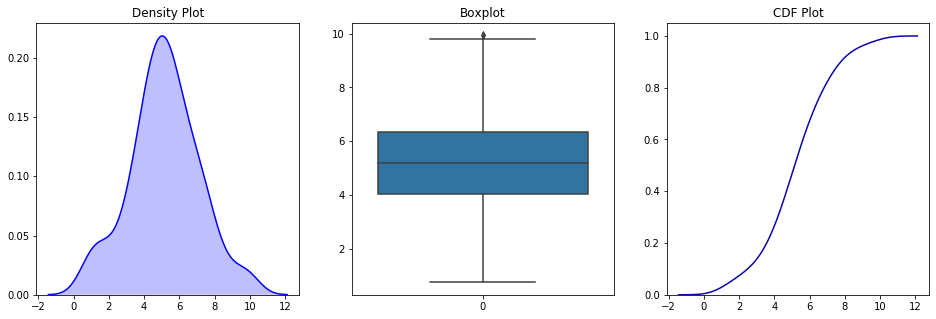

In [76]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 3, figsize=(16,5), sharex=False)

# Density Plots
sns.kdeplot(data, shade=True, color="b", ax=axes[0])
axes[0].set_title('Density Plot')

# Boxplots 
sns.boxplot(data=data, ax=axes[1]);
axes[1].set_title('Boxplot')

# CDF plot 
sns.kdeplot(data, color='#0504aa', cumulative=True, ax=axes[2]);
axes[2].set_title('CDF Plot');

**Q4.** Find the 42nd, 77th and 99th percentiles of this vector and disply these percentiles on a density plot  

42nd percentile: 4.811589390969248
77th percentile: 6.425445213663819
99th percentile: 9.79086627760007


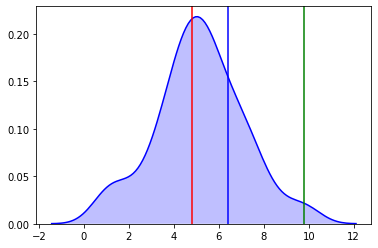

In [77]:
print("42nd percentile:", np.quantile(data, 0.42))
print("77th percentile:", np.quantile(data, 0.77))
print("99th percentile:", np.quantile(data, 0.99))

# Density Plots
sns.kdeplot(data, shade=True, color="b")

# Percentile Lines
plt.axvline(np.quantile(data, 0.42),color='r', linestyle='-') # 42nd percentile
plt.axvline(np.quantile(data, 0.77),color='b', linestyle='-') # 77th percentile
plt.axvline(np.quantile(data, 0.99), color='g', linestyle='-'); # 99th percentile

# Remember what this means, the 42nd percentile is the value (or score)
# below which 42% of the observations may be found.

**Q5.** Find interquartile range using this vector

In [78]:
# IQR = Q3 - Q1
Q1 = np.quantile(data, .25) 
Q3 = np.quantile(data, .75)

IQR = Q3-Q1
print("IQR:", IQR)

IQR: 2.3122356534983153


**Q6.** Compute the 20th percentile along with the upper and lower quartiles of a Poisson distribution with λ = 14. 

In [79]:
print("20th Percentile, Lower Quartile and Upper Quartile:", stats.poisson.ppf(q = [0.20, 0.25, 0.75], mu=14))

20th Percentile, Lower Quartile and Upper Quartile: [11. 11. 16.]


**Q7.** There are 20 multiple choice questions in a test. Each question has 5 possible answers and only one of them is correct. 

**(i)** Find the probability of having exactly 1 correct answer if a student attempts to answer every question at random. 

**(ii)** Find the probability of having 5 or less correct answers if a student attempts to answer every question at random.

In [80]:
# In  this case we are going to use the binomial distribution 
# (correct answer = success. Random variable X is number of correct 
# answers in 20 trials (questions) where the probability of success 
# is the probability of answering one question correctly 
# by random is 1/5 = 0.2. 

# (i) Probability of having exactly 1 correct answer
print("Probability of 1 correct answer:", stats.binom.pmf(1, 20, 0.2))

# (ii)  Find the probability of having 5 or less correct answers if a 
# student attempts to answer every question at random.
print("Probability of having 5 or less correct answers:", sum(stats.binom.pmf(list(range(0, 6)), 20, 0.2)))

# Alternatively, we can use the cumulative probability function:
# it's just a probability of observing q or less number of successes 
print("Probability of having 5 or less correct answers:", stats.binom.cdf(5, 20, 0.2))

Probability of 1 correct answer: 0.057646075230342306
Probability of having 5 or less correct answers: 0.8042077854595479
Probability of having 5 or less correct answers: 0.8042077854595495


**Q8.** There are 5 transcription-factor binding sites (TF BSs) on average in a bin/region of length 2000nt.  Find the probability of having more than 15 TF BSs in a particular bin of the same length. 

In [81]:
# Seems like we can us the Poisson distribution here: 
# we have λ = 5 (average number of TF BSs per bin).

# We can calculate the probability of having 15 or less TF BSs using:
print("Probability of having 15 or less:", stats.poisson.cdf(k=15, mu=5))

# So we can calculate the probability of having more than 15 by:
print("Probability of having more than 15:", 1-stats.poisson.cdf(k=15, mu=5))
# Highly Unlikely! 

Probability of having 15 or less: 0.9999309917581444
Probability of having more than 15: 6.900824185562815e-05


**Q9.** Generate 10 observations from the t-distribution. 

In [82]:
# Generates values from T-distribution with parameters df = n-1 = 10-1 = 9
print("Generated Sample:", stats.t.rvs(df=9, size=10))

Generated Sample: [ 0.21369334 -0.84204521 -0.25320574 -0.4256828   3.03058559  0.70260644
  0.44968875  0.76068791  0.77340733  0.05284414]


**Q10.** Find the 1st, 4th and 99th percentile of the uniform distribution with parameters: min=1 and max=6.

In [83]:
print("1st percentile:", stats.uniform.ppf(q = 0.01, loc=1, scale=5))
print("4th percentile:", stats.uniform.ppf(q = 0.04, loc=1, scale=5))
print("99th percentile:", stats.uniform.ppf(q = 0.99, loc=1, scale=5))

1st percentile: 1.05
4th percentile: 1.2
99th percentile: 5.95


**Q11** Find 68%, 75% and 95% confidence intervals for a population mean, if you have this sample:

sample = [-2.14, 7.21, -0.98, 2.14, 2.66, -2.48, -4.64, 3.08, -2.82, 5.84,3.17, 8.71, 6.5, 4.97, 6.08, 13.2, 10.29, 3.78, 7.2, 5.6, 3.34, 
7.67, 10.88, 5.01, 14.37, 7.64, 11.42, 10.64, 9.02, 7.9, 6.05, 11.25]

In [84]:
Sample = [-2.14, 7.21, -0.98, 2.14, 2.66, -2.48, -4.64, 3.08, -2.82, 5.84, 
          3.17, 8.71, 6.5, 4.97, 6.08, 13.2, 10.29, 3.78, 7.2, 5.6, 3.34, 
          7.67, 10.88, 5.01, 14.37, 7.64, 11.42, 10.64, 9.02, 7.9, 6.05, 11.25]

# CI
print("68% CI:", stats.t.interval(0.68, len(Sample)-1, loc=np.mean(Sample), scale=stats.sem(Sample)))
print("75% CI:", stats.t.interval(0.75, len(Sample)-1, loc=np.mean(Sample), scale=stats.sem(Sample)))
print("95% CI:", stats.t.interval(0.95, len(Sample)-1, loc=np.mean(Sample), scale=stats.sem(Sample)))

68% CI: (4.8540573302905, 6.5559426697095)
75% CI: (4.717952856678547, 6.692047143321453)
95% CI: (3.9878074352703967, 7.422192564729603)


### Questions for Part 2 

**Q1.** Suppose we have gene expression data (given below) for a set of genes in two samples, one under stress condition (e.g. starvation) and the other under normal conditions i.e. untreated control samples. We want to identify whether expression of the gene changes during stress (in both directions, it could be up-regulated or down-regulated). 

Carry out an appropriate analysis of the data. You should plot the data in order to visualise the difference between the 2 groups, if any is present. Next you should consider what kind of test should be used, paired or unpaired and what is the hypothesis we are testing. You should also test whether the assumptions are met in order to determine whether a parametric or non-parametric test is required.

df = pd.DataFrame(dict(

sample=[4.63, 3.72, 3.81, 5.22, 5.19, 4.86, 5.49, 2.46, 4.43, 3.87, 4.88, 3.2, 3.64, 2.79, 4.97, 5.77, 3.08, 4.04, 4.79, 5.74], 

control=[2.96, 3.07, 1.13, 3.76, 1.33, 3.06, 2.19, 1.32, 2.23, 0, 0.76, 2.52, 2.18, 1.9, 3.26, 1.26, 3.22, 1.5, 1.23, 2.13]))

In [85]:
import pandas as pd # For creation of dataframes and associated operations

df = pd.DataFrame(dict(sample=[4.63, 3.72, 3.81, 5.22, 5.19, 4.86, 5.49, 2.46, 4.43, 3.87, 4.88, 3.2, 3.64, 
                               2.79, 4.97, 5.77, 3.08, 4.04, 4.79, 5.74],
                       control=[2.96, 3.07, 1.13, 3.76, 1.33, 3.06, 2.19, 1.32, 2.23, 0, 0.76, 2.52, 2.18, 
                                1.9, 3.26, 1.26, 3.22, 1.5, 1.23, 2.13]))

# Preview 
df.head()

,sample,control
0,4.63,2.96
1,3.72,3.07
2,3.81,1.13
3,5.22,3.76
4,5.19,1.33


#### 1) Visualise the Data

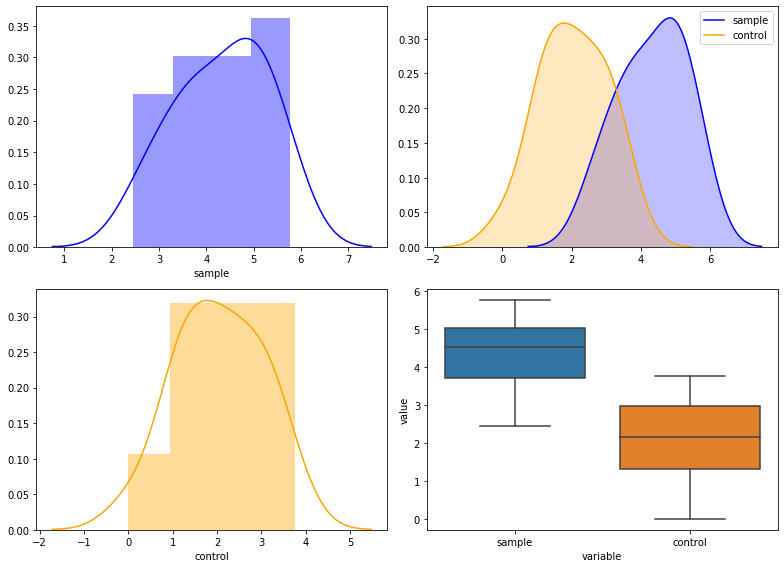

In [86]:
# We will use the module seaborn to carry out most of the data visualisations 
import matplotlib.pyplot as plt # Used for data visualisations

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(11,8), sharex=False)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df.iloc[:,0], hist=True, color="b", ax=axes[0, 0])

# Density plots with histogram (of cell counts)
sns.distplot(df.iloc[:,1], hist=True, color="orange", ax=axes[1,0])

# Density plots (of cell counts)
p1=sns.kdeplot(df.iloc[:,0], shade=True, color="b", ax=axes[0,1])
p1=sns.kdeplot(df.iloc[:,1], shade=True, color="orange", ax=axes[0,1])

# Boxplots (of cell counts)
sns.boxplot(x="variable", y="value", data=pd.melt(df), ax=axes[1,1]);

#plt.setp(axes, yticks=[])
plt.tight_layout()

#### 2)  Determine Test Arguments 

**What kind of test should be applied here, paired or unpared?** 

Unpaired as there are 2 different samples (objects are independent). 

**What are hypotheses, one-sided or two-sided?**

Two-sided; 

**H0:** mean_condition = mean_control

**H1:** mean_condition != mean_control

#### 3) Are the Assumptions met?

The assumptions of the t-test are that the data are normally distributed and the variances of the groups to be compared are homogeneous (equal). To test the normality assumption we can use Shapiro-Wilk’s test and to assess the equal variance assumption we can use Bartlett’s Test or Levene’s Test.

#### Shapiro-Wilks Test

The null hypothesis for the Shapiro-Wilk test is that a variable is normally distributed in some population and the alternative hypothesis is that a variable is not normally distributed in some population.

#### Levene's Test iand  Bartlett's Test 
The assumption of equal variances has to be tested next. If the samples follow a normal distribution we use Bartlett’s Test to test the equality of variances. The Levene test is an alternative to the Bartlett test and is less sensitive to departures from normality. The null hypothesis for both tests is that the variances are equal for all samples while the alternate hypothesis (the one you’re testing), is that the variances are not equal.

Treatment: (0.9581854343414307, 0.5082672834396362)
Control: (0.9671719670295715, 0.6943987607955933)


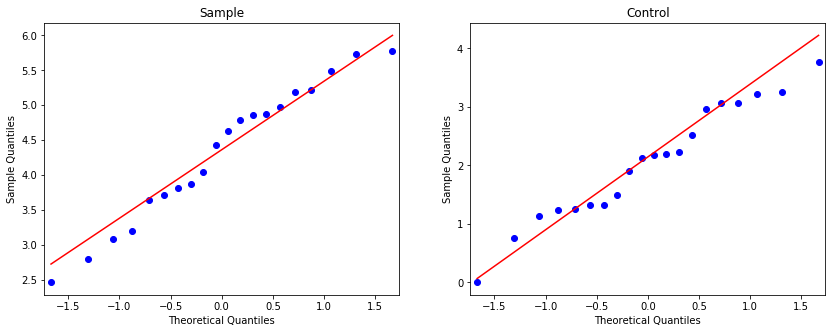

In [87]:
# Assumptions of Normality

# Sample
print("Treatment:", stats.shapiro(df.iloc[:,0]))

# Control
print("Control:", stats.shapiro(df.iloc[:,1]))

# For both groups p-value > 0.05 implying that the distribution of 
# the data are not significantly different from normal distribution

# Look at qqplots 
import statsmodels.api as sm

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot qqplots
sm.qqplot(df.iloc[:,0], line='q', ax=axes[0])
axes[0].set_title('Sample')

sm.qqplot(df.iloc[:,1], line='q', ax=axes[1])
axes[1].set_title('Control');

In [88]:
# Assumption of equal variances 

print("Bartlett's p-value:", stats.bartlett(df.iloc[:,1], df.iloc[:,0])[1])
print("Levene's P-value:", stats.levene(df.iloc[:,0], df.iloc[:,1])[1])

# The variances of the groups should be compared (whether they are equal).
# P-value >= 0.05, we fail to reject H0 that variance are the same. 

Bartlett's p-value: 0.9964368004307891
Levene's P-value: 0.8616530869064156


#### 4) Carry out Test 

Based on the above, we decide to use an unpaired T-test with equal variances and two-sided alternative.

In [89]:
# Carry out two-sided unpaired t-test using assumption of equal variances (assumption which should be checked 
# before applying test)

# H0: mean_control = mean_treatment
# H1: mean_control != mean_treatment 

ttest = stats.ttest_ind(df.iloc[:,0], df.iloc[:,1], equal_var=True) # Sample, the control 

print("Two-sided t-test test statistic:", ttest[0])
print("Two-sided t-test p-value:", ttest[1])

# Confidence interval for the mean difference does not contain 0 and strictly positive: (1.649432, 2.907568). 
# So we reject H0 that means are equal.

import statsmodels.stats.api as sms
print("95% CI:", sms.DescrStatsW(df.iloc[:,0] - df.iloc[:,1]).tconfint_mean()) # Sample - Control

Two-sided t-test test statistic: 7.33240440714008
Two-sided t-test p-value: 8.770102345860734e-09
95% CI: (1.6465496029770303, 2.91045039702297)


**Q2.** Diffuse large B-cell lymphoma (DLBCL) is the most common subtype of non-Hodgkin lymphoma (NHL). There are two major biologically distinct molecular subtypes of DLBCL: germinal center B-cell (GCB) and activated B-cell (ABC). 

Suppose that we want to test whether the gene BCL-2 plays an important role with respect to discriminating DLBCL ABC from DLBCL GCB patients. We are interested in whether the expression of BCL-2 in patients with GCB type is higher than in patients with ABC. In the dataframe below there is BCL-2 expression for patients with DLBCL ABC and DLBCL GCB.

Carry out an appropriate analysis of the data. You should plot the data in order to visualise the difference between the 2 groups, if any is present. Next you should consider what kind of test should be used, paired or unpaired and what is the hypothesis we are testing. You should also test whether the assumptions met in order to determine whether a parametirc or non-parametric test is required.

df2 = pd.DataFrame(dict(
ABC = [1.736, 3.408, 2.54, 1.501, 1.405, 2.057, 2.924, 3.147, 2.309, 2.774, 
1.929, 1.695, 1.467, 1.61, 4.986, 1.684, 0.926, 1.163, 2.8, 1.125, 
0.8, 0.56, 1.408, 1.704, 1.724],

GCB = [1.605, 1.662, 2.468, 2.231, 2.163, 1.673, 2.536, 2.41, 1.205, 4.508, 
1.475, 1.617, 1.906, 2.55, 1.55, 3.756, 6.132, 4.455, 4.448, 1.688, 
2.091, 2.312, 5.972, 4.213, 3.11]))

In [90]:
df2 = pd.DataFrame(dict(
ABC = [1.736, 3.408, 2.54, 1.501, 1.405, 2.057, 2.924, 3.147, 2.309, 2.774, 
1.929, 1.695, 1.467, 1.61, 4.986, 1.684, 0.926, 1.163, 2.8, 1.125, 
0.8, 0.56, 1.408, 1.704, 1.724],
GCB = [1.605, 1.662, 2.468, 2.231, 2.163, 1.673, 2.536, 2.41, 1.205, 4.508, 
1.475, 1.617, 1.906, 2.55, 1.55, 3.756, 6.132, 4.455, 4.448, 1.688, 
2.091, 2.312, 5.972, 4.213, 3.11]))

#### 1) Visualise the Data

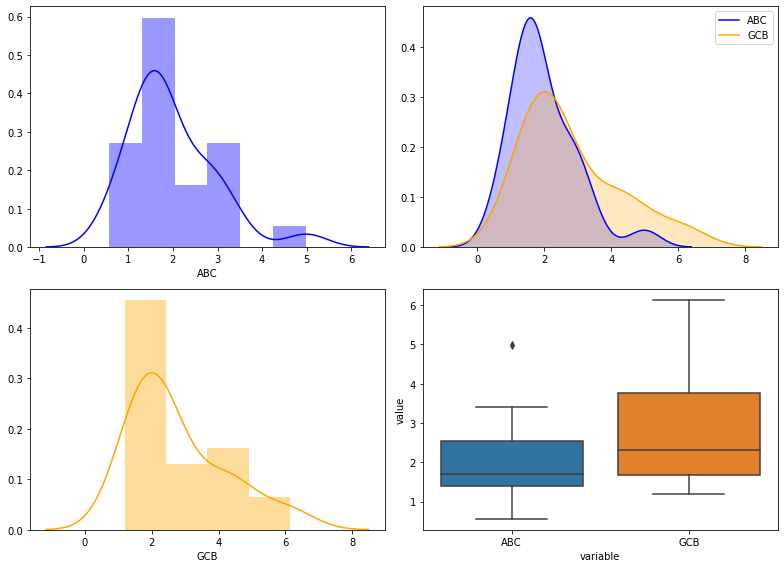

In [91]:
# We will use the module seaborn to carry out most of the data visualisations 
import matplotlib.pyplot as plt # Used for data visualisations

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(11,8), sharex=False)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df2.iloc[:,0], hist=True, color="b", ax=axes[0, 0])

# Density plots with histogram (of cell counts)
sns.distplot(df2.iloc[:,1], hist=True, color="orange", ax=axes[1,0])

# Density plots (of cell counts)
p1=sns.kdeplot(df2.iloc[:,0], shade=True, color="b", ax=axes[0,1])
p1=sns.kdeplot(df2.iloc[:,1], shade=True, color="orange", ax=axes[0,1])

# Boxplots (of cell counts)
sns.boxplot(x="variable", y="value", data=pd.melt(df2), ax=axes[1,1]);

#plt.setp(axes, yticks=[])
plt.tight_layout()

#### 2)  Determine Test Arguments 

**What kind of test should be applied here, paired or unpared?** 

Unpaired as there are 2 different samples each with different patients (objects are independent). 

**What are hypotheses, one-sided or two-sided?**

One-sided; 

**H0:** mean_GCB = mean_ABC

**H1:** mean_GCB > mean_ABC

#### 3) Are the Assumptions met?

The assumptions of the t-test are that the data are normally distributed and the variances of the groups to be compared are homogeneous (equal). To test the normality assumption we can use Shapiro-Wilk’s test and to assess the equal variance assumption we can use Bartlett’s Test or Levene’s Test.

#### Shapiro-Wilks Test

The null hypothesis for the Shapiro-Wilk test is that a variable is normally distributed in some population and the alternative hypothesis is that a variable is not normally distributed in some population.

#### Levene's Test iand  Bartlett's Test 
The assumption of equal variances has to be tested next. If the samples follow a normal distribution we use  Bartlett’s Test to test the equality of variances. The Levene test is an alternative to the Bartlett test that is less sensitive to departures from normality. The null hypothesis for both tests is that the variances are equal for all samples while the alternate hypothesis (the one you’re testing), is that the variances are not equal.

ABC: (0.9064939022064209, 0.025474365800619125)
GCB: (0.8489943742752075, 0.0016855753492563963)


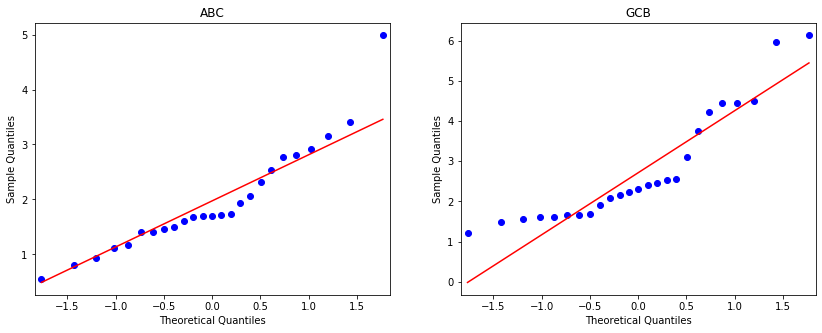

In [92]:
# Assumptions of Normality

# ABC
print("ABC:", stats.shapiro(df2.iloc[:,0]))

# GCB
print("GCB:", stats.shapiro(df2.iloc[:,1]))

# For both groups p-value < 0.05 implying that the distribution of 
# the data are significantly different from the normal distribution

# Look at qqplots 
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot qqplots
sm.qqplot(df2.iloc[:,0], line='q', ax=axes[0])
axes[0].set_title('ABC')

sm.qqplot(df2.iloc[:,1], line='q', ax=axes[1])
axes[1].set_title('GCB');

In [93]:
# Assumption of equal variances 

print("Bartlett's p-value:", stats.bartlett(df2.iloc[:,1], df2.iloc[:,0])[1])
print("Levene's P-value:", stats.levene(df2.iloc[:,1], df2.iloc[:,0])[1])

# The variances of the groups should be compared (whether they are 
# equal). P-value >= 0.05, we fail to reject H0 that variance are the same. 

Bartlett's p-value: 0.07401438908969532
Levene's P-value: 0.18352509662818745


#### 4) Carry out Test 

Based on the above, we decide to use an unpaired non-parametric test to compare 2 groups (one-sided alternative).

In [94]:
print("Wilcoxon statistic:", stats.wilcoxon(df2.iloc[:,1], df2.iloc[:,0], alternative='greater', correction=True)[0])
print("Wilcoxon p-value:", stats.wilcoxon(df2.iloc[:,1], df2.iloc[:,0], alternative='greater', correction=True)[1])

# H0: mean_GCB = mean_ABC
# H1: mean_GCB > mean_ABC

# p-value < 0.05, so we can reject H0  and conclude that the 
# BCL-2 expression is higher in GCB patients than in ABC patients. 

Wilcoxon statistic: 239.0
Wilcoxon p-value: 0.020431111910713364


**Q3.** Suppose you performed a genome wide association study (GWAS) for n=20 SNPs. You have got n p-values. Apply any multiple adjustment correction. How many significant p-values do you have before and after correction?

p_values = [0.6082, 0.0266, 0.0174, 0.5522, 0.9615, 0.3277, 0.7874, 0.2051, 0.4608, 0.0472, 0.0164, 0.202, 0.8077, 0.1624, 0.9985, 0.0459, 0.1305, 0.2581, 0.9922, 0.2984]

In [95]:
p_values = [0.6082, 0.0266, 0.0174, 0.5522, 0.9615, 0.3277, 0.7874, 0.2051, 0.4608, 0.0472, 0.0164, 0.202, 0.8077,
            0.1624, 0.9985, 0.0459, 0.1305, 0.2581, 0.9922, 0.2984]

print("Number of significant p-values before:", sum(i < 0.05 for i in p_values))

# Python has a module to adjust the p-values of each observation 
from statsmodels.sandbox.stats.multicomp import multipletests

p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
print("Number of significant p-values after:", sum(p_adjusted[1] <=0.05))

Number of significant p-values before: 5
Number of significant p-values after: 0


**Q4** Suppose you want to check whether there is a correlation between the expression of two genes. You have 30 samples.  Choose an appropriate test for that. To answer this question we should do a number of things. First, plot the data to be sure that it looks like there is linear dependency in the data, check normality of the data and decide the appropriate test to use. 

df3 = pd.DataFrame(dict(
Gene1 = [0.089, 0.239, 0.531, 0.054, 0.625, 0.488, 0.522, 0.37, 0.347, 
        0.393, 0.513, 0.794, 0.354, 0.085, 0.144, 0.493, 0.021, 0.596,
        0.417, 0.504, 0.597, 0.229, 0.137, 0.843, 0.37, 0.421, 0.509, 
        0.626, 0.325, 0.115],
        
Gene2 = [5.411, 4.206, 3.744, 4.892, 11.021, 4.03, 7.741, 3.588, 9.762, 4.765, 7.147, 12.538, 10.066, 10.245, 7.657, 6.804, 8.888, 12.123, 4.583, 3.123, 4.062, 8.963, 6.108, 6.119, 8.919, 6.634, 10.857, 6.934, 6.564, 5.296]))

In [96]:
df3 = pd.DataFrame(dict(Gene1 = [0.089, 0.239, 0.531, 0.054, 0.625, 0.488, 0.522, 0.37, 0.347, 0.393, 0.513, 
                                  0.794, 0.354, 0.085, 0.144, 0.493, 0.021, 0.596, 0.417, 0.504, 0.597, 0.229, 
                                  0.137, 0.843, 0.37, 0.421, 0.509, 0.626, 0.325, 0.115],
                        Gene2 = [5.411, 4.206, 3.744, 4.892, 11.021, 4.03, 7.741, 3.588, 9.762, 4.765, 7.147, 
                                 12.538, 10.066, 10.245, 7.657, 6.804, 8.888, 12.123, 4.583, 3.123, 4.062, 8.963, 
                                 6.108, 6.119, 8.919, 6.634, 10.857, 6.934, 6.564, 5.296]))

#### 1) Visualise Data

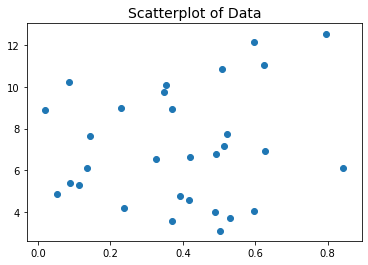

In [97]:
# Plot them first to convince that there is linear dependence (a linear relationship)
plt.scatter(df3.iloc[:,0], df3.iloc[:,1])
plt.title('Scatterplot of Data', fontsize=14);

# It looks more like a cloud rather than it has clear linear. 

#### 2) Check Normality Assumption

In [98]:
# Check the normality assumption first
# Rememer the null hypothesis for this test is that the data are normally distributed

print("Gene1 p-value:", stats.shapiro(df3.iloc[:,0])[1])
# p-value = 0.385, we can assume normality

print("Gene2 p-value:", stats.shapiro(df3.iloc[:,1])[1])
# p-value = 0.160, we can assume normality

# P-value > 0.05, we fail to reject H0, so data seem to be normally 
# distributed.

Gene1 p-value: 0.3851942718029022
Gene2 p-value: 0.16028191149234772


#### 3) Carry Out Test

In [99]:
# We can use parametric correlation test i.e. Pearson.
# This function gives us the summary we need. 

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(len(x)-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

# Apply function 
print("Correlation:", pearsonr_ci(df3.iloc[:,0], df3.iloc[:,1], 0.05)[0])
print("P-value:", pearsonr_ci(df3.iloc[:,0], df3.iloc[:,1], 0.05)[1])
print("CI Lower Bound:", pearsonr_ci(df3.iloc[:,0], df3.iloc[:,1], 0.05)[2])
print("CI Upper Bound:", pearsonr_ci(df3.iloc[:,0], df3.iloc[:,1], 0.05)[3])

# P-value = 0.4454, so we fail to reject H0. 
# 95 percent confidence interval = (-0.2273846, 0.4799819) and 
# does contain 0. So we can conclude that there is no correlation 
# between the 2 genes.

Correlation: 0.14474180777132895
P-value: 0.4453865168611533
CI Lower Bound: -0.22738461729880632
CI Upper Bound: 0.4799818860282319


### Questions for Part 3

In this question we want to see if we can predict the phenotype feature based on the expression of several genes. We are going to do this by building linear regression models and comparing them. For this question you should produce: 

* Scatterplots and correlation plots to visualise data
* A simple model containing the most promising predictor
* A summary of the model and interpret it 
* A model incorporating all genes (predictors) at once
* Models with different sets of predictors
* A comparison of these models

In [100]:
# Read data from file 'linreg_task.txt'
data3 = pd.read_csv("Datasets/linreg_task.txt", sep="\t")
data3.head()

,feature,geneA,geneB,geneC,geneD
1,5.752,16.643,1.108,34.244,28.418
2,15.766,72.700,19.274,57.923,74.064
3,8.180,24.745,-9.423,32.620,31.759
4,17.660,56.805,61.973,61.373,4.299
5,18.809,102.237,42.059,57.282,41.696


#### 1) Visualise Data 

          feature     geneA     geneB     geneC     geneD
feature  1.000000  0.661121  0.583260  0.827792  0.041254
geneA    0.661121  1.000000  0.549247  0.536280  0.187783
geneB    0.583260  0.549247  1.000000  0.421894 -0.002098
geneC    0.827792  0.536280  0.421894  1.000000 -0.014214
geneD    0.041254  0.187783 -0.002098 -0.014214  1.000000


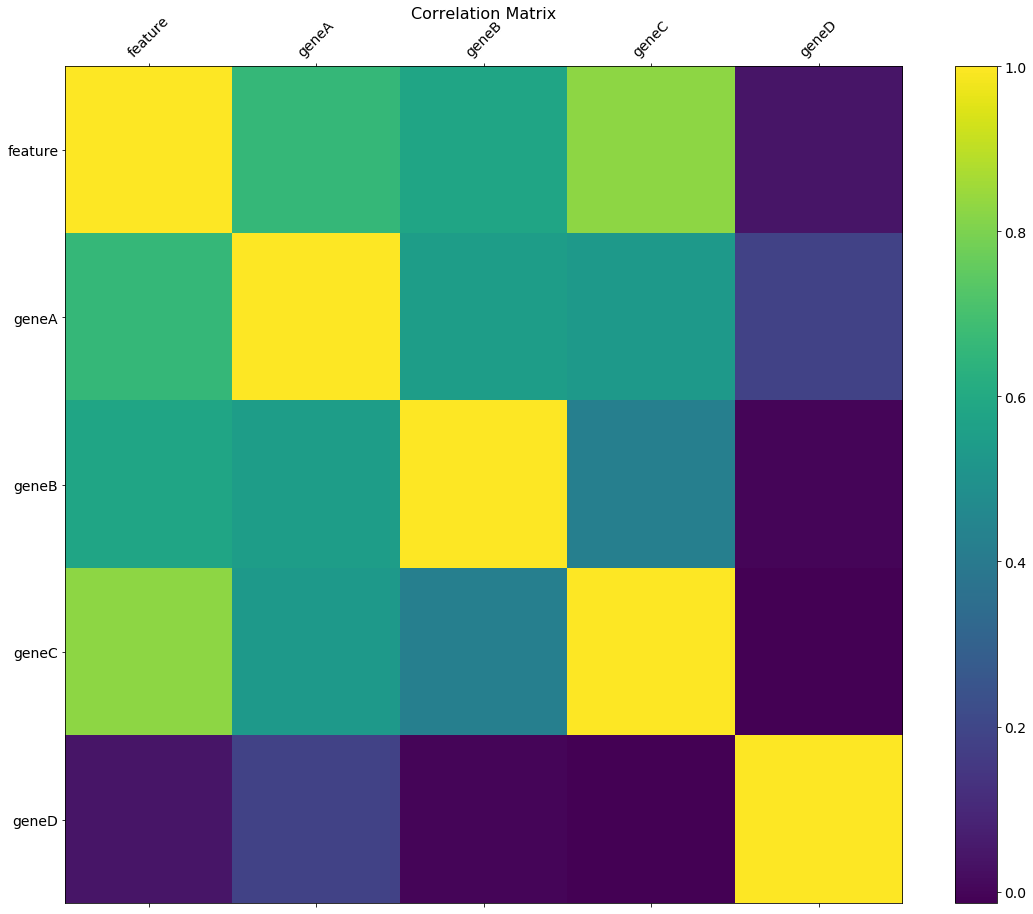

In [101]:
# Calculate the correlation matrix  
print(pd.DataFrame(data3).corr())

# Correlation Plot 
f = plt.figure(figsize=(19, 15))
plt.matshow(pd.DataFrame(data3).corr(), fignum=f.number)
plt.xticks(range(pd.DataFrame(data3).shape[1]), pd.DataFrame(data3).columns, fontsize=14, rotation=45)
plt.yticks(range(pd.DataFrame(data3).shape[1]), pd.DataFrame(data3).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

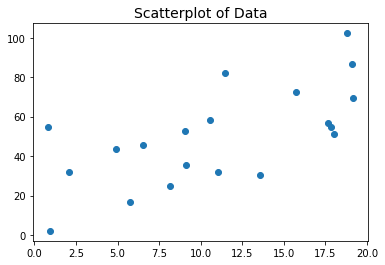

In [102]:
# Plot them first to convince that there is linear dependence 
# (a linear relationship)
plt.scatter(data3.iloc[:,0], data3.iloc[:,1])
plt.title('Scatterplot of Data', fontsize=14);

# Seems there may be a positive relationship

From the correlation matrix and plot above we can see that the highest correlation in the data is between the feature and geneC (0.827792). This correlation is positive and this can be seen in the scatterplot above. We will start by building a model with this one predictor. 

#### 2) Simple Linear Regression Model Containing geneC

In [110]:
# Define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data3.iloc[:,0:5])

# Define our x and y
X = df["geneC"]
y = df["feature"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model1 = sm.OLS(y, X).fit() # build the model using Ordinary Least Squares method

# Print out the statistics
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                feature   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     39.19
Date:                Sun, 10 May 2020   Prob (F-statistic):           6.65e-06
Time:                        17:12:36   Log-Likelihood:                -53.020
No. Observations:                  20   AIC:                             110.0
Df Residuals:                      18   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4696      1.726      0.852      0.406      -2.156       5.096
geneC          0.2636      0.042      6.260      0.000       0.175       0.352
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.260
Skew:                           0.036   Prob(JB):                        0.878
Kurtosis:                       2.446   Cond. No.                         87.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**H0:** b = 0 (The slope is equal to zero i.e. there is no link between predictor and outcome) 

**H1:** b != 0 (The slope is not equal to zero i.e. there is a link between predictor and outcome)

From the output we can see that the P(>|t|) for geneC is < 0.05. As a result we reject H0 and conclude that there is a link between the outcome and predictor (geneC). 

The adjusted R-squared is 0.668. This means that about 67% of the response variable variation is explained by our linear model. Let's see how the model does when all predictors are included.

#### 3) Multiple Linear Regression Containing All Predictors

In [104]:
# Define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data3.iloc[:,0:5])

# Define our x and y
X = df[["geneA", "geneB", "geneC", "geneD"]]
y = df["feature"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model2 = sm.OLS(y, X).fit() # build the model using Ordinary Least Squares method

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                feature   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     13.20
Date:                Sun, 10 May 2020   Prob (F-statistic):           8.35e-05
Time:                        17:12:14   Log-Likelihood:                -49.494
No. Observations:                  20   AIC:                             109.0
Df Residuals:                      15   BIC:                             114.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6541      2.390     -0.274      0.788      -5.749       4.441
geneA          0.0535      0.042      1.281      0.220      -0.036       0.143
geneB          0.0694      0.051      1.360      0.194      -0.039       0.178
geneC          0.2006      0.047      4.276      0.001       0.101       0.301
geneD          0.0033      0.037      0.089      0.930      -0.076       0.082
==============================================================================
Omnibus:                        1.351   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                0.835
Skew:                           0.494   Prob(JB):                        0.659
Kurtosis:                       2.846   Cond. No.                         275.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**H0:** b = 0 (The slope is equal to zero i.e. there is no link between predictor and outcome) 

**H1:** b != 0 (The slope is not equal to zero i.e. there is a link between predictor and outcome)

From the above output we can see that the only predictor that is significant is geneC is P(>|t|) = 0.001 < 0.05. As a result we reject H0 for geneC and conclude that there is a link between the outcome and predictor (geneC). For the other predictors (geneA, geneB and geneD) we fail to reject H0 and conclude that there is no link between these predictors and the feature of interest.  

The adjusted R-squared is 0.720. This means that about 72% of the response variable variation is explained by our extended linear model. Adjusted R-squared is higher than was for our first model. 

But do we really need to include so many predictors in the model? When building the linear regression models or any model, we want to be able to interpret it and overcrowding with too many predictors is not helpful.

Let's create another model and exclude geneD as a predictor because it has the lowest correlation with feature. 

#### 4) Multiple Linear Regression Containing geneA, geneB and geneC

In [105]:
# Define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data3.iloc[:,0:5])

# Define our x and y
X = df[["geneA", "geneB", "geneC"]]
y = df["feature"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model3 = sm.OLS(y, X).fit() # build the model using Ordinary Least Squares method

# Print out the statistics
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                feature   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     18.76
Date:                Sun, 10 May 2020   Prob (F-statistic):           1.72e-05
Time:                        17:12:14   Log-Likelihood:                -49.499
No. Observations:                  20   AIC:                             107.0
Df Residuals:                      16   BIC:                             111.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5193      1.789     -0.290      0.775      -4.313       3.274
geneA          0.0545      0.039      1.392      0.183      -0.029       0.137
geneB          0.0689      0.049      1.402      0.180      -0.035       0.173
geneC          0.2001      0.045      4.436      0.000       0.104       0.296
==============================================================================
Omnibus:                        1.392   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                0.876
Skew:                           0.506   Prob(JB):                        0.645
Kurtosis:                       2.836   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**H0:** b = 0 (The slope is equal to zero i.e. there is no link between predictor and outcome) 

**H1:** b != 0 (The slope is not equal to zero i.e. there is a link between predictor and outcome)

From the above output we can see that the only predictor that is significant is geneC is P(>|t|) < 0.001 < 0.05. As a result we reject H0 for geneC and conclude that there is a link between the outcome and predictor (geneC). For the other predictors (geneA, geneB) we fail to reject H0 and conclude that there is no link between these predictors and the feature of interest.  

The adjusted R-squared is 0.737. This means that about 74% of the response variable variation is explained by our extended linear model. Adjusted R-squared is higher than was for our first model and second model. 

Let's compare these 3 models to see which one is the most appropriate.

#### 5) Compare Models 

In [109]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Model 1 and Model 2
model1 = ols('feature ~ geneC', data=df).fit()
model2 = ols('feature ~ geneA + geneB + geneC + geneD', data=df).fit()
anovaResults = anova_lm(model1, model2)
print("Model 1 vs Model 2:")
print(anovaResults);

# Model 2 and Model 3
model3 = ols('feature ~ geneA + geneB + geneC', data=df).fit()
model2 = ols('feature ~ geneA + geneB + geneC + geneD', data=df).fit()
anovaResults = anova_lm(model3, model2)
print("Model 2 vs Model 3:")
print(anovaResults);

# Model 1 and Model 3
model1 = ols('feature ~ geneC', data=df).fit()
model3 = ols('feature ~ geneA + geneB + geneC', data=df).fit()
anovaResults = anova_lm(model1, model3)
print("Model 1 vs Model 3:")
print(anovaResults);

Model 1 vs Model 2:
   df_resid         ssr  df_diff    ss_diff         F    Pr(>F)
0      18.0  235.061554      0.0        NaN       NaN       NaN
1      15.0  165.214460      3.0  69.847094  2.113831  0.141328
Model 2 vs Model 3:
   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0      16.0  165.301455      0.0       NaN       NaN       NaN
1      15.0  165.214460      1.0  0.086995  0.007898  0.930359
Model 1 vs Model 3:
   df_resid         ssr  df_diff    ss_diff        F    Pr(>F)
0      18.0  235.061554      0.0        NaN      NaN       NaN
1      16.0  165.301455      2.0  69.760098  3.37614  0.059808


The above tests whether one model is significantly better at capturing the data than the other model. If the resulting p-value is sufficiently low (usually less than 0.05), we conclude that the first model is significantly better than the second one, and thus favor the first model.

**Extra Question - Tricky** 

As you might recall, the T-statistic in a 2-sample T-test follows the T-distribution under the null hypothesis (H0). But how are the p-values distributed under the null hypothesis (H0)? 

Check it in Python using the file provided in the datasets folder. The file contains the p-values of multiple t-tests (1000 t-tests) for 2 samples distributed normally with the same parameters. Density plots and qqplots can be used to determine its distribution.

p_values = pd.read_csv("Datasets/Ttest-pvalues", sep="\t") 

In [107]:
p_values = pd.read_csv("Datasets/Ttest-pvalues.txt", sep="\t") 

# Preview the first 5 lines of the loaded data 
p_values.head()

,ttest_pvalues
0,0.992514
1,0.015519
2,0.843954
3,0.483024
4,0.368303


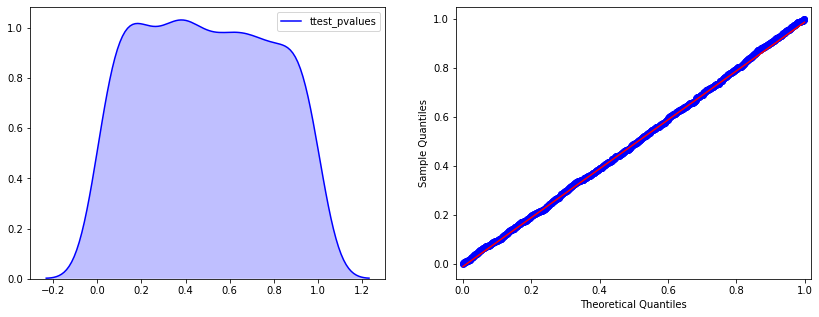

In [108]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot Density 
sns.kdeplot(p_values.iloc[:,0], shade=True, color="b", ax=axes[0])

# Plot qqplots
sm.qqplot(p_values.iloc[:,0], dist = stats.distributions.uniform, line='q', ax=axes[1]);

Follows a uniform distribution. The p-values for any statistical test should follow a uniform distribution between 0 and 1. Any value in the interval 0 to 1 is just as likely to occur as any other value. 